# Your first convolutional neural network

# imports

In [1]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

Using TensorFlow backend.


# data

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [6]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = LeakyReLU()(x)
x = BatchNormalization()(x)

x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
__________

# train

In [8]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [9]:
model.layers[2].get_weights()

[]

In [10]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 220s 4ms/step - loss: 1.6647 - acc: 0.4403 - val_loss: 1.1782 - val_acc: 0.5883
Epoch 2/10
50000/50000 [==============================] - 224s 4ms/step - loss: 1.1489 - acc: 0.5963 - val_loss: 1.0132 - val_acc: 0.6443
Epoch 3/10
50000/50000 [==============================] - 244s 5ms/step - loss: 0.9986 - acc: 0.6511 - val_loss: 0.9444 - val_acc: 0.6712
Epoch 4/10
50000/50000 [==============================] - 230s 5ms/step - loss: 0.9123 - acc: 0.6819 - val_loss: 0.9036 - val_acc: 0.6862
Epoch 5/10
50000/50000 [==============================] - 235s 5ms/step - loss: 0.8520 - acc: 0.7033 - val_loss: 0.8577 - val_acc: 0.7019
Epoch 6/10
50000/50000 [==============================] - 227s 5ms/step - loss: 0.8058 - acc: 0.7195 - val_loss: 0.8147 - val_acc: 0.7187
Epoch 7/10
50000/50000 [==============================] - 229s 5ms/step - loss: 0.7551 - acc: 0.7372 - val_loss: 0.8055 - 

In [108]:
model.layers[6].get_weights()

[array([0.96023625, 1.0363294 , 0.9807387 , 0.9356765 , 1.0121671 ,
        0.9473878 , 1.0066526 , 1.0009254 , 0.9982277 , 1.087719  ,
        0.9212615 , 0.9379336 , 0.9902715 , 1.0315461 , 0.9945381 ,
        1.0610253 , 1.0414884 , 0.99314314, 1.0269263 , 0.9872436 ,
        0.9641181 , 1.0010475 , 0.9668784 , 1.0327625 , 1.0170848 ,
        1.0142869 , 1.0092481 , 0.9845155 , 0.9843551 , 0.92236805,
        0.98142874, 0.9626884 ], dtype=float32),
 array([-0.02627409, -0.10376667, -0.12798727, -0.12734899, -0.14115468,
        -0.15232714, -0.12181854, -0.18183869, -0.14609051, -0.16409718,
        -0.11551003, -0.13012198, -0.00120563,  0.00462373, -0.08708022,
        -0.06935041, -0.16653018, -0.03715561, -0.16693728, -0.15389696,
        -0.11686924, -0.12118189, -0.09051432, -0.06333148, -0.00601734,
        -0.17442344, -0.11044028, -0.04899298, -0.18829457, -0.11255743,
        -0.04444654, -0.10859493], dtype=float32),
 array([-0.03491527, -0.06019443,  0.11761849,  0.1774

# analysis

In [11]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 15s 1ms/step


[0.8423407137393951, 0.7155999958515167]

In [12]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

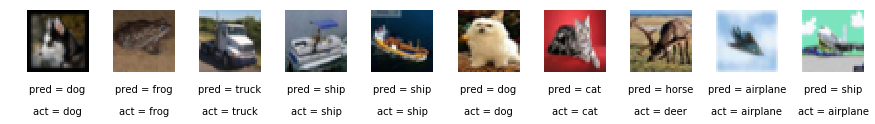

In [15]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
